<a href="https://colab.research.google.com/github/Jihyeon3717/data_cleaning/blob/main/datacleaning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<분석 문제 발굴>

하향식 접근 방법 : 분석할 문제가 확실한 상황

상향식 접근 방법 : 문제 정의자체가 어려운 경우
 - 객관적 데이터 관찰(군집, 상관관계 등등) 후 action  



---



분석방법 : 하향식 접근 방법
 -> is_fraud의 데이터 특성 추출 후 원본 데이터셋 가공(drop)  


---



is_fraud 데이터 특징(해당 조건 만족하면 사기 거래 가능성 높음)
1. 밤 12시 ~ 6시 사이 & 이상치 정도의 큰 금액 2번 이상(_net 결제 포함)
2. 이상치 정도의 금액이 결제된 후 48시간 이내에 비슷한 금액대,category로 추가 결제
3. 한번 결제할때 1500불이상 결제

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns

In [341]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [342]:
from google.colab import files
cc_df = pd.read_csv('/content/drive/MyDrive/fraud.csv')

In [343]:
pd.set_option('display.max_columns', 50)

In [344]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [345]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [346]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [347]:
#cc_df = cc_df.drop(['first', 'last'], axis=1) #이름 제거

In [348]:
pd.set_option('display.max_rows', 30)

In [349]:
is_fraud_df = cc_df[cc_df['is_fraud'] == 1]
is_fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,fraud_Murray-Smitham,grocery_pos,358.24,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,8a5d80eb4f573480db90899dd8b1c34a,1387592501,47.526202,-113.643313,1
477847,2020-12-21 02:36:03,4716561796955522,fraud_Schmidt and Sons,shopping_net,859.12,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,fe8464ee336fe08b2adacdd0867b1343,1387593363,48.272348,-112.328075,1
479296,2020-12-21 22:38:38,4716561796955522,fraud_Quitzon-Goyette,home,209.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,7cde9b7604a025e251756a4bc9615888,1387665518,49.173669,-112.698767,1
479305,2020-12-21 22:42:11,4716561796955522,fraud_Schulist Ltd,food_dining,123.58,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,daabc7ccf6ccf2c85c1f6186ca11193a,1387665731,48.913048,-113.214921,1


In [350]:
is_fraud_df['full_name'] = is_fraud_df['first'] + ' ' + is_fraud_df['last']
is_fraud_df

<ipython-input-350-8909d585cd43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_fraud_df['full_name'] = is_fraud_df['first'] + ' ' + is_fraud_df['last']


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,fraud_Murray-Smitham,grocery_pos,358.24,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,8a5d80eb4f573480db90899dd8b1c34a,1387592501,47.526202,-113.643313,1,Lauren Anderson
477847,2020-12-21 02:36:03,4716561796955522,fraud_Schmidt and Sons,shopping_net,859.12,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,fe8464ee336fe08b2adacdd0867b1343,1387593363,48.272348,-112.328075,1,Lauren Anderson
479296,2020-12-21 22:38:38,4716561796955522,fraud_Quitzon-Goyette,home,209.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,7cde9b7604a025e251756a4bc9615888,1387665518,49.173669,-112.698767,1,Lauren Anderson
479305,2020-12-21 22:42:11,4716561796955522,fraud_Schulist Ltd,food_dining,123.58,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,daabc7ccf6ccf2c85c1f6186ca11193a,1387665731,48.913048,-113.214921,1,Lauren Anderson


In [351]:
is_fraud_df['full_name'].unique()

array(['Larry House', 'Becky Mckinney', 'Dustin Roberts',
       'Sabrina Johnson', 'Michelle Gregory', 'Dorothy Thomas',
       'Joanna Hudson', 'Lindsay Wilson', 'Margaret Lam', 'Janet Turner',
       'Rebecca Erickson', 'Tyler Wright', 'Ashley Whitney',
       'Mackenzie Salazar', 'Brianna Foley', 'Lori Ramirez',
       'Kristina Stewart', 'Joseph Gonzalez', 'Matthew Lambert',
       'Jose Vasquez', 'Samuel Johnston', 'Amber Lewis', 'Robert Haynes',
       'Rachel Daniels', 'Mark Wood', 'Allison Allen', 'Stacy Lambert',
       'Kenneth Foster', 'Samuel Jenkins', 'Sara Harris',
       'Sharon Johnson', 'Destiny Lowe', 'Carol Dillon',
       'Breanna Rodriguez', 'Barbara Taylor', 'Sarah Clark',
       'Shannon Williams', 'Tara Campbell', 'Lauren Torres',
       'Kenneth Sanchez', 'Michelle Johnston', 'Shelby Mitchell',
       'Kimberly Gonzalez', 'Sharon Smith', 'Ashley Lopez', 'Susan Hardy',
       'Anna Logan', 'Donna Moreno', 'Jessica Ward', 'Juan Sherman',
       'Daniel Briggs', 

In [352]:
LH = is_fraud_df[is_fraud_df['full_name']=='Larry House']

In [353]:
LH

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House
5240,2019-01-13 07:26:22,581686439828,fraud_Koepp-Witting,grocery_pos,308.84,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,4b0bb07d70781956a70549795582c9e6,1326439582,42.194299,-80.572425,1,Larry House
5453,2019-01-13 17:01:46,581686439828,fraud_Volkman-Predovic,shopping_net,1033.78,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,6ba68638101b4e6bbdbc1dd12bbb7163,1326474106,41.609588,-80.173127,1,Larry House
5597,2019-01-13 22:00:13,581686439828,fraud_Rempel Inc,shopping_net,859.46,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,bc9565442347deeb1802d1ad1e7f7464,1326492013,41.872000,-79.602970,1,Larry House
5608,2019-01-13 22:24:58,581686439828,fraud_Kris-Padberg,shopping_pos,728.77,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,56775000f150234b32a3d2c7fbb4103e,1326493498,41.250399,-79.519284,1,Larry House
5647,2019-01-13 23:33:40,581686439828,fraud_Schoen-Quigley,kids_pets,20.96,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,073324baf7534266c5d6b1b6448ceca3,1326497620,41.100634,-79.380160,1,Larry House


In [354]:
import folium

# 지도 생성 (처음 위치를 중간 정도 위도와 경도로 설정)
map_center = [LH['merch_lat'].mean(), LH['merch_long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# # 위도와 경도 데이터를 이용해 각 위치에 마커 추가
# for idx, row in LH.iterrows():
#     folium.Marker(
#         [row['merch_lat'], row['merch_long']], popup=f"{row['trans_date_trans_time']} \n {row['amt']} \n {row['category']}").add_to(m)

# 정렬된 데이터프레임을 사용해 순서대로 마커 추가
for idx, row in enumerate(LH.iterrows(), start=1):  # idx를 1부터 시작하도록 설정
    lat = row[1]['merch_lat']
    long = row[1]['merch_long']
    popup_text = f"{row[1]['trans_date_trans_time']} \n {row[1]['amt']} \n {row[1]['category']}"

    # DivIcon을 사용해 숫자 표시
    folium.Marker(
        location=[lat, long],
        popup=popup_text,
        icon=folium.DivIcon(
            icon_size=(20, 20),
            icon_anchor=(7, 20),
            html=f'<div style="font-size: 12pt; color: black; font-weight: bold;">{idx}</div>'
        )
    ).add_to(m)

home_lat = LH.iloc[0]['lat']
home_long = LH.iloc[0]['long']
folium.Marker(
    [home_lat, home_long], popup="Home Location", icon=folium.Icon(color='red')).add_to(m)
m

In [355]:
BM = is_fraud_df[is_fraud_df['full_name']=='Becky Mckinney']

In [356]:
BM

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
5160,2019-01-13 00:49:04,180031190491743,fraud_Hermann and Sons,shopping_pos,952.08,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,7eb9b1814acf9db55a170d8d9e5497ee,1326415744,30.803533,-88.140115,1,Becky Mckinney
5171,2019-01-13 01:31:07,180031190491743,fraud_Gleason-Macejkovic,shopping_net,1060.34,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,36fab39dc4c5d0fdda638c7d2c72957d,1326418267,31.602312,-88.685518,1,Becky Mckinney
5341,2019-01-13 13:32:07,180031190491743,fraud_Schaefer Ltd,kids_pets,19.19,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,2c0ba943e985120ed416b9bfd2a4a984,1326461527,30.917934,-88.582726,1,Becky Mckinney
5614,2019-01-13 22:35:51,180031190491743,fraud_Barton LLC,kids_pets,25.27,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,5c8894c2fb26e0afa976f20eb59b76d3,1326494151,31.146301,-89.003622,1,Becky Mckinney
5634,2019-01-13 23:10:28,180031190491743,fraud_Brown Inc,kids_pets,23.18,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,ab14fe770158d580e3393f3d330cdb03,1326496228,30.209000,-88.981982,1,Becky Mckinney
5649,2019-01-13 23:39:20,180031190491743,"fraud_Durgan, Gislason and Spencer",home,224.94,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,947e68521c0487c2e9ad53bdcdb1941a,1326497960,30.344517,-88.770517,1,Becky Mckinney
5666,2019-01-14 00:18:25,180031190491743,fraud_Kuphal-Bartoletti,misc_net,813.73,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,2f89edf911e131d3336bfc731933f588,1326500305,31.703636,-87.507845,1,Becky Mckinney
5702,2019-01-14 02:43:50,180031190491743,"fraud_Goldner, Kovacek and Abbott",grocery_pos,377.28,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,43e1b97100ba13e6c5f715dd583ea046,1326509030,30.707366,-88.776325,1,Becky Mckinney
5705,2019-01-14 02:52:48,180031190491743,fraud_Eichmann-Russel,misc_pos,7.24,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,a93d07e0e9c40f29f31c55ff30eabbab,1326509568,31.427686,-88.056135,1,Becky Mckinney
5743,2019-01-14 05:02:51,180031190491743,fraud_Barrows PLC,shopping_pos,747.46,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,dba0ca54d812169d4248c7681e758036,1326517371,31.460253,-89.039611,1,Becky Mckinney


In [357]:
import folium

# 지도 생성 (처음 위치를 중간 정도 위도와 경도로 설정)
map_center = [BM['merch_lat'].mean(), BM['merch_long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# # 위도와 경도 데이터를 이용해 각 위치에 마커 추가
# for idx, row in LH.iterrows():
#     folium.Marker(
#         [row['merch_lat'], row['merch_long']], popup=f"{row['trans_date_trans_time']} \n {row['amt']} \n {row['category']}").add_to(m)

# 정렬된 데이터프레임을 사용해 순서대로 마커 추가
for idx, row in enumerate(BM.iterrows(), start=1):  # idx를 1부터 시작하도록 설정
    lat = row[1]['merch_lat']
    long = row[1]['merch_long']
    popup_text = f"{row[1]['trans_date_trans_time']} \n {row[1]['amt']} \n {row[1]['category']}"

    # DivIcon을 사용해 숫자 표시
    folium.Marker(
        location=[lat, long],
        popup=popup_text,
        icon=folium.DivIcon(
            icon_size=(20, 20),
            icon_anchor=(7, 20),
            html=f'<div style="font-size: 12pt; color: black; font-weight: bold;">{idx}</div>'
        )
    ).add_to(m)

home_lat = BM.iloc[0]['lat']
home_long = BM.iloc[0]['long']
folium.Marker(
    [home_lat, home_long], popup="Home Location", icon=folium.Icon(color='red')).add_to(m)


m

In [358]:
DR = is_fraud_df[is_fraud_df['full_name']=='Dustin Roberts']

In [359]:
DR

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
5711,2019-01-14 03:14:00,3595192916105588,"fraud_Jones, Sawayn and Romaguera",misc_net,801.35,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,2a320da2adc016ec78cead0769271bc8,1326510840,35.860218,-78.037255,1,Dustin Roberts
5723,2019-01-14 03:49:26,3595192916105588,"fraud_Ferry, Lynch and Kautzer",misc_net,746.43,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,30b0bda9de86545ecb428351feb78bb1,1326512966,35.549423,-79.986157,1,Dustin Roberts
6257,2019-01-14 22:23:44,3595192916105588,fraud_Price Inc,shopping_net,1169.82,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,b6c205f15cb1c8f58765bebd99cb4b6f,1326579824,35.849003,-78.638156,1,Dustin Roberts
6258,2019-01-14 22:23:54,3595192916105588,"fraud_Kerluke, Considine and Macejkovic",misc_net,690.81,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,cc0ce65bebf95fd2b2f76b3f8d2c15f7,1326579834,35.439158,-78.609636,1,Dustin Roberts
6315,2019-01-14 23:43:47,3595192916105588,fraud_Barton LLC,kids_pets,20.63,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,f4a3089fa904c27d3613bfc9b5833317,1326584627,35.549738,-78.076512,1,Dustin Roberts
6338,2019-01-15 00:21:45,3595192916105588,fraud_Pacocha-O'Reilly,grocery_pos,297.74,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,5c88b17c2138d3a0196e5817efa5c2f4,1326586905,34.233493,-78.376370,1,Dustin Roberts
6359,2019-01-15 02:31:09,3595192916105588,"fraud_Schumm, Bauch and Ondricka",grocery_pos,328.58,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,acbc8e2cc4530d8e7a6d3043db72c983,1326594669,35.808195,-79.179802,1,Dustin Roberts
6372,2019-01-15 03:07:43,3595192916105588,fraud_Heidenreich PLC,grocery_pos,331.43,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,83f1ff8a1b9fcbaf197c3add55d983ae,1326596863,35.755802,-78.388004,1,Dustin Roberts
6465,2019-01-15 09:37:51,3595192916105588,fraud_Bednar Group,misc_net,760.83,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,e1d3c80ec4fa788aec2c2254760bf9c3,1326620271,35.645904,-79.261858,1,Dustin Roberts
6894,2019-01-15 22:05:57,3595192916105588,fraud_Kovacek Ltd,travel,10.29,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.008,238602,"Scientist, research (maths)",1993-05-14,94971557dbb3bc25471ff8e5d1358962,1326665157,35.102385,-79.953349,1,Dustin Roberts


In [360]:
import folium

# 지도 생성 (처음 위치를 중간 정도 위도와 경도로 설정)
map_center = [DR['merch_lat'].mean(), DR['merch_long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# # 위도와 경도 데이터를 이용해 각 위치에 마커 추가
# for idx, row in LH.iterrows():
#     folium.Marker(
#         [row['merch_lat'], row['merch_long']], popup=f"{row['trans_date_trans_time']} \n {row['amt']} \n {row['category']}").add_to(m)

# 정렬된 데이터프레임을 사용해 순서대로 마커 추가
for idx, row in enumerate(DR.iterrows(), start=1):  # idx를 1부터 시작하도록 설정
    lat = row[1]['merch_lat']
    long = row[1]['merch_long']
    popup_text = f"{row[1]['trans_date_trans_time']} \n {row[1]['amt']} \n {row[1]['category']}"

    # DivIcon을 사용해 숫자 표시
    folium.Marker(
        location=[lat, long],
        popup=popup_text,
        icon=folium.DivIcon(
            icon_size=(20, 20),
            icon_anchor=(7, 20),
            html=f'<div style="font-size: 12pt; color: black; font-weight: bold;">{idx}</div>'
        )
    ).add_to(m)

home_lat = DR.iloc[0]['lat']
home_long = DR.iloc[0]['long']
folium.Marker(
    [home_lat, home_long], popup="Home Location", icon=folium.Icon(color='red')).add_to(m)


m

In [361]:
not_fraud_df = cc_df[cc_df['is_fraud'] == 0]

In [362]:
not_fraud_df['full_name'] = not_fraud_df['first'] + ' ' + not_fraud_df['last']
not_fraud_df

<ipython-input-362-db03021b79c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_fraud_df['full_name'] = not_fraud_df['first'] + ' ' + not_fraud_df['last']


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,Kenneth Robinson
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,Mary Wall
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,Daniel Escobar
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,Jenna Brooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,Rebecca Erickson
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,Ana Howell
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson


In [363]:
not_fraud_df['full_name'].unique()

array(['Stephanie Gill', 'Kenneth Robinson', 'Mary Wall',
       'Daniel Escobar', 'Jenna Brooks', 'Ashley Lopez',
       'Margaret Curtis', 'Vicki Mendoza', 'Sabrina Johnson',
       'Sharon Johnson', 'Mark Wood', 'Lauren Anderson', 'Monica Cohen',
       'Andrew Patterson', 'Erin Chavez', 'Christine Harris',
       'Barbara Taylor', 'Ana Howell', 'Scott Martin', 'Barbara Lowe',
       'Lisa Lin', 'Valerie Davis', 'Ashley Whitney', 'James Cooper',
       'Tammy Ayers', 'Monica Tucker', 'Crystal Gamble', 'Jason Singh',
       'Julia Bell', 'Lindsay Wilson', 'David Rodriguez', 'Robert Haynes',
       'Gary Martinez', 'Carrie Washington', 'Jessica Ward',
       'Kristina Stewart', 'Juan Sherman', 'Jackie Davis',
       'Joseph Gonzalez', 'Tyler Wright', 'Sarah Bishop', 'Larry House',
       'Amber Lewis', 'Sara Ramirez', 'James Stephens', 'Linda Davis',
       'Samuel Jenkins', 'Allison Allen', 'Erica Briggs', 'Andrew Mcgee',
       'Margaret Lam', 'Michelle Gregory', 'Shelby Mitchell',


In [364]:
temp = not_fraud_df[not_fraud_df['full_name']=='Becky Mckinney']

<Axes: xlabel='trans_date_trans_time', ylabel='amt'>

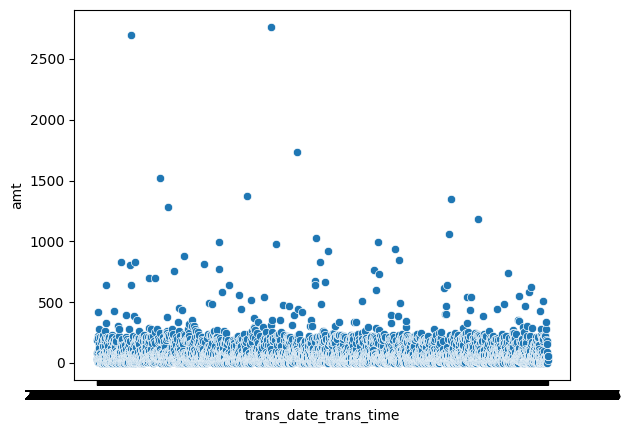

In [365]:
sns.scatterplot(x=temp['trans_date_trans_time'], y=temp['amt'])

In [366]:
nBM=not_fraud_df[not_fraud_df['full_name']=='Becky Mckinney'].head(88)

<Axes: xlabel='trans_date_trans_time', ylabel='amt'>

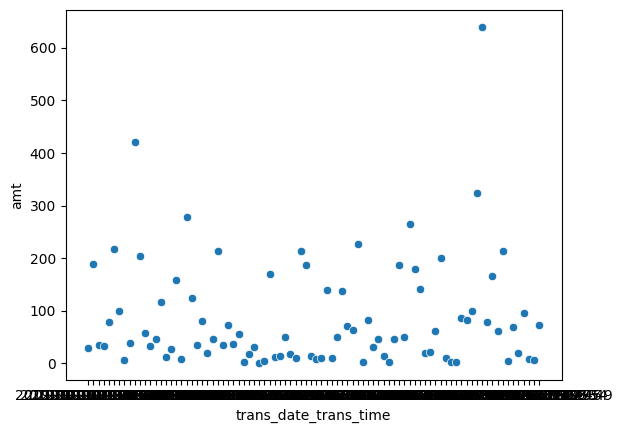

In [367]:
sns.scatterplot(x=nBM['trans_date_trans_time'], y=nBM['amt'])

In [368]:
BM

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
5160,2019-01-13 00:49:04,180031190491743,fraud_Hermann and Sons,shopping_pos,952.08,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,7eb9b1814acf9db55a170d8d9e5497ee,1326415744,30.803533,-88.140115,1,Becky Mckinney
5171,2019-01-13 01:31:07,180031190491743,fraud_Gleason-Macejkovic,shopping_net,1060.34,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,36fab39dc4c5d0fdda638c7d2c72957d,1326418267,31.602312,-88.685518,1,Becky Mckinney
5341,2019-01-13 13:32:07,180031190491743,fraud_Schaefer Ltd,kids_pets,19.19,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,2c0ba943e985120ed416b9bfd2a4a984,1326461527,30.917934,-88.582726,1,Becky Mckinney
5614,2019-01-13 22:35:51,180031190491743,fraud_Barton LLC,kids_pets,25.27,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,5c8894c2fb26e0afa976f20eb59b76d3,1326494151,31.146301,-89.003622,1,Becky Mckinney
5634,2019-01-13 23:10:28,180031190491743,fraud_Brown Inc,kids_pets,23.18,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,ab14fe770158d580e3393f3d330cdb03,1326496228,30.209000,-88.981982,1,Becky Mckinney
5649,2019-01-13 23:39:20,180031190491743,"fraud_Durgan, Gislason and Spencer",home,224.94,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,947e68521c0487c2e9ad53bdcdb1941a,1326497960,30.344517,-88.770517,1,Becky Mckinney
5666,2019-01-14 00:18:25,180031190491743,fraud_Kuphal-Bartoletti,misc_net,813.73,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,2f89edf911e131d3336bfc731933f588,1326500305,31.703636,-87.507845,1,Becky Mckinney
5702,2019-01-14 02:43:50,180031190491743,"fraud_Goldner, Kovacek and Abbott",grocery_pos,377.28,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,43e1b97100ba13e6c5f715dd583ea046,1326509030,30.707366,-88.776325,1,Becky Mckinney
5705,2019-01-14 02:52:48,180031190491743,fraud_Eichmann-Russel,misc_pos,7.24,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,a93d07e0e9c40f29f31c55ff30eabbab,1326509568,31.427686,-88.056135,1,Becky Mckinney
5743,2019-01-14 05:02:51,180031190491743,fraud_Barrows PLC,shopping_pos,747.46,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,dba0ca54d812169d4248c7681e758036,1326517371,31.460253,-89.039611,1,Becky Mckinney


<Axes: xlabel='trans_date_trans_time', ylabel='amt'>

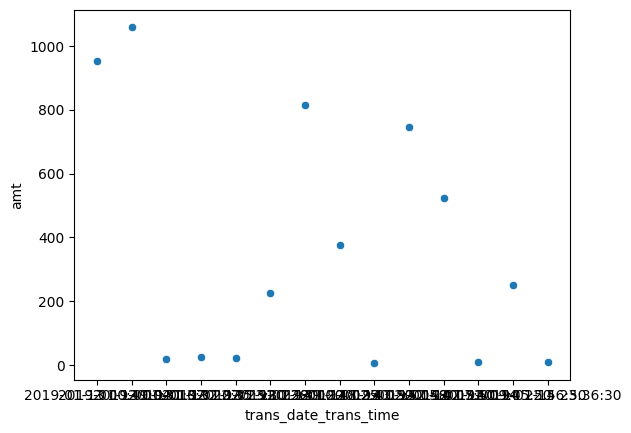

In [369]:
sns.scatterplot(x=BM['trans_date_trans_time'], y=BM['amt'])

In [370]:
temp1 = not_fraud_df[not_fraud_df['full_name']=='Larry House']

<Axes: xlabel='trans_date_trans_time', ylabel='amt'>

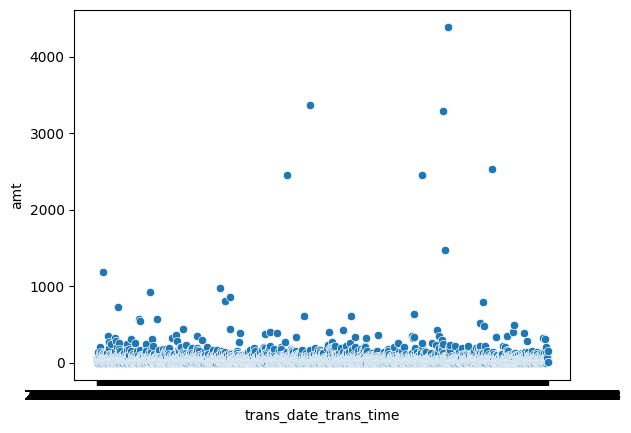

In [371]:
sns.scatterplot(x=temp1['trans_date_trans_time'], y=temp1['amt'])

In [372]:
nLH=not_fraud_df[not_fraud_df['full_name']=='Larry House'].head(88)

In [373]:
nLH

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
43,2019-01-01 03:00:10,581686439828,"fraud_Tromp, Kerluke and Glover",grocery_net,59.67,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,e89e8a26c9d0dd9739193dc4b6765222,1325386810,40.891784,-79.319239,0,Larry House
71,2019-01-01 05:19:28,581686439828,fraud_Ledner-Pfannerstill,gas_transport,75.19,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8c53aab5f919cb16c65317e246989bbc,1325395168,42.124225,-79.201431,0,Larry House
86,2019-01-01 06:48:12,581686439828,fraud_Kling-Grant,grocery_net,60.32,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,b149038da8b0b01fe6e820fff05c0d55,1325400492,40.563586,-79.136622,0,Larry House
312,2019-01-01 16:04:26,581686439828,"fraud_Prosacco, Kreiger and Kovacek",home,66.65,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,df941bf319f556872d8b5650141ff601,1325433866,41.258741,-80.689766,0,Larry House
417,2019-01-01 18:50:17,581686439828,fraud_Stark-Koss,home,19.76,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,bef5e2602e45fb42eb263bdeb4c77e6b,1325443817,41.423516,-80.421378,0,Larry House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10467,2019-01-24 06:17:30,581686439828,fraud_Schamberger-O'Keefe,grocery_pos,65.40,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,f4a1331815747fcd7707f80a4200a579,1327385850,41.724606,-80.225487,0,Larry House
10601,2019-01-24 15:37:43,581686439828,fraud_Kemmer-Buckridge,misc_pos,8.21,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,23372557b4e127cb95dba6c61ab323d7,1327419463,40.894322,-79.985092,0,Larry House
10785,2019-01-25 00:47:02,581686439828,fraud_Parisian and Sons,gas_transport,69.19,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,46ac7256be9dc960f62dfb1a5bfbae4c,1327452422,42.081731,-80.323599,0,Larry House
10786,2019-01-25 00:49:15,581686439828,fraud_Cassin-Harvey,grocery_net,36.52,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,5ce2aadf980367c1ef6873b5c417d5cf,1327452555,41.546857,-80.814414,0,Larry House


<Axes: xlabel='trans_date_trans_time', ylabel='amt'>

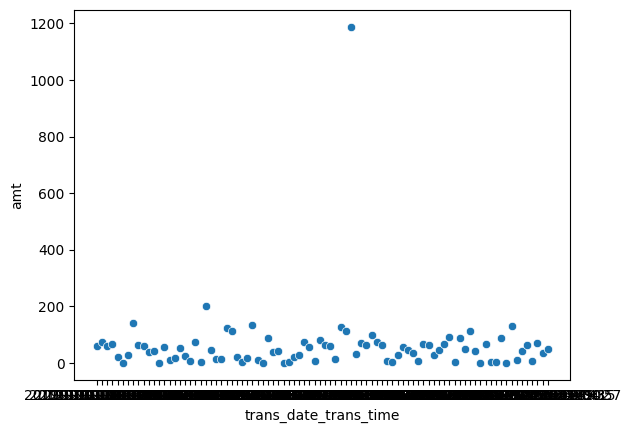

In [374]:
sns.scatterplot(x=nLH['trans_date_trans_time'], y=nLH['amt'])

<Axes: xlabel='trans_date_trans_time', ylabel='amt'>

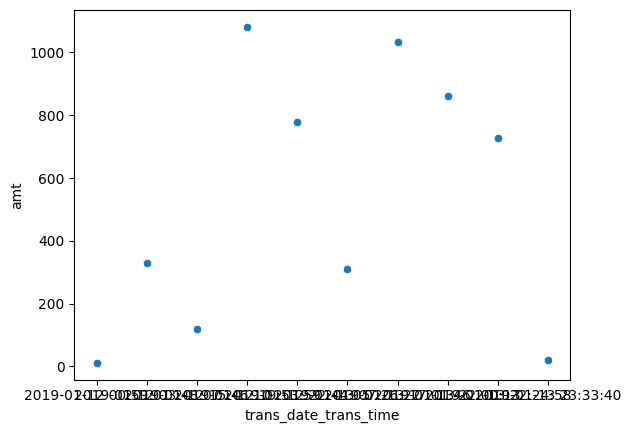

In [375]:
sns.scatterplot(x=LH['trans_date_trans_time'], y=LH['amt'])

In [376]:
new_cc_df = cc_df.drop(['cc_num', 'merchant', 'gender', 'street', 'city', 'state', 'zip', 'city_pop', 'job', 'trans_num', 'unix_time' ], axis=1)

In [377]:
new_cc_df

,trans_date_trans_time,category,amt,first,last,lat,long,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,grocery_pos,107.23,Stephanie,Gill,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:12:34,grocery_pos,44.71,Kenneth,Robinson,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0
2,2019-01-01 00:17:16,grocery_net,46.28,Mary,Wall,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0
3,2019-01-01 00:20:15,grocery_pos,64.09,Daniel,Escobar,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0
4,2019-01-01 00:23:41,misc_pos,25.58,Jenna,Brooks,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,home,134.26,Rebecca,Erickson,34.2651,-77.8670,1983-02-08,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,shopping_pos,25.49,Ana,Howell,34.0326,-82.2027,1984-06-03,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,kids_pets,111.84,Jose,Vasquez,29.0393,-95.4401,1999-12-27,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,kids_pets,86.88,Ann,Lawson,46.1966,-118.9017,1981-11-29,46.658340,-119.715054,0


In [378]:
new_cc_df['full_name'] = new_cc_df['first'] + ' ' + new_cc_df['last']
new_cc_df

,trans_date_trans_time,category,amt,first,last,lat,long,dob,merch_lat,merch_long,is_fraud,full_name
0,2019-01-01 00:00:44,grocery_pos,107.23,Stephanie,Gill,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0,Stephanie Gill
1,2019-01-01 00:12:34,grocery_pos,44.71,Kenneth,Robinson,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0,Kenneth Robinson
2,2019-01-01 00:17:16,grocery_net,46.28,Mary,Wall,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0,Mary Wall
3,2019-01-01 00:20:15,grocery_pos,64.09,Daniel,Escobar,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0,Daniel Escobar
4,2019-01-01 00:23:41,misc_pos,25.58,Jenna,Brooks,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0,Jenna Brooks
...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,home,134.26,Rebecca,Erickson,34.2651,-77.8670,1983-02-08,34.853497,-78.664158,0,Rebecca Erickson
491130,2020-12-31 23:56:57,shopping_pos,25.49,Ana,Howell,34.0326,-82.2027,1984-06-03,35.008839,-81.475156,0,Ana Howell
491131,2020-12-31 23:59:09,kids_pets,111.84,Jose,Vasquez,29.0393,-95.4401,1999-12-27,29.661049,-96.186633,0,Jose Vasquez
491132,2020-12-31 23:59:15,kids_pets,86.88,Ann,Lawson,46.1966,-118.9017,1981-11-29,46.658340,-119.715054,0,Ann Lawson


In [379]:
from geopy.distance import distance

In [380]:
# 이동 거리를 저장할 빈 리스트 생성
distances = []

# full_name별로 그룹화하여 거리 계산
for name, group in is_fraud_df.groupby('full_name'):
    # 그룹 내 각 거래 간 거리 계산
    group_distances = [0]  # 첫 거래의 이동 거리는 0으로 설정
    for i in range(1, len(group)):
        loc1 = (group.iloc[i - 1]['merch_lat'], group.iloc[i - 1]['merch_long'])
        loc2 = (group.iloc[i]['merch_lat'], group.iloc[i]['merch_long'])
        group_distances.append(distance(loc1, loc2).km)

    # 각 그룹의 거리 리스트를 distances에 추가
    distances.extend(group_distances)

# 계산된 거리 리스트를 새로운 'distance' 컬럼으로 추가
is_fraud_df['distance'] = distances

# 결과 확인
is_fraud_df[['full_name', 'trans_date_trans_time', 'lat', 'long', 'distance']].head()

<ipython-input-380-0f6e4fda0cd8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_fraud_df['distance'] = distances


,full_name,trans_date_trans_time,lat,long,distance
4794,Larry House,2019-01-12 00:59:01,41.5205,-80.0573,0.000000
4816,Larry House,2019-01-12 03:48:07,41.5205,-80.0573,102.736204
4979,Larry House,2019-01-12 15:46:10,41.5205,-80.0573,57.853888
5073,Larry House,2019-01-12 19:53:59,41.5205,-80.0573,94.500170
5124,Larry House,2019-01-12 22:44:05,41.5205,-80.0573,64.735199


In [381]:
is_fraud_df.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House,0.000000
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House,102.736204
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House,57.853888
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House,94.500170
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House,64.735199
5160,2019-01-13 00:49:04,180031190491743,fraud_Hermann and Sons,shopping_pos,952.08,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,7eb9b1814acf9db55a170d8d9e5497ee,1326415744,30.803533,-88.140115,1,Becky Mckinney,58.864404
5171,2019-01-13 01:31:07,180031190491743,fraud_Gleason-Macejkovic,shopping_net,1060.34,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,36fab39dc4c5d0fdda638c7d2c72957d,1326418267,31.602312,-88.685518,1,Becky Mckinney,38.156133
5240,2019-01-13 07:26:22,581686439828,fraud_Koepp-Witting,grocery_pos,308.84,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,4b0bb07d70781956a70549795582c9e6,1326439582,42.194299,-80.572425,1,Larry House,150.151078
5341,2019-01-13 13:32:07,180031190491743,fraud_Schaefer Ltd,kids_pets,19.19,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,2c0ba943e985120ed416b9bfd2a4a984,1326461527,30.917934,-88.582726,1,Becky Mckinney,111.371761
5453,2019-01-13 17:01:46,581686439828,fraud_Volkman-Predovic,shopping_net,1033.78,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,6ba68638101b4e6bbdbc1dd12bbb7163,1326474106,41.609588,-80.173127,1,Larry House,0.000000


In [382]:
# '_net'으로 끝나는 category 값은 1, 나머지는 0으로 설정하여 새로운 열 'is_internet' 생성
is_fraud_df['is_internet'] = is_fraud_df['category'].apply(lambda x: 1 if x.endswith('_net') else 0)

<ipython-input-382-96fe9c26e94f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_fraud_df['is_internet'] = is_fraud_df['category'].apply(lambda x: 1 if x.endswith('_net') else 0)


In [383]:
is_fraud_df.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance,is_internet
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House,0.000000,0
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House,102.736204,0
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House,57.853888,0
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House,94.500170,1
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House,64.735199,1
5160,2019-01-13 00:49:04,180031190491743,fraud_Hermann and Sons,shopping_pos,952.08,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,7eb9b1814acf9db55a170d8d9e5497ee,1326415744,30.803533,-88.140115,1,Becky Mckinney,58.864404,0
5171,2019-01-13 01:31:07,180031190491743,fraud_Gleason-Macejkovic,shopping_net,1060.34,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,36fab39dc4c5d0fdda638c7d2c72957d,1326418267,31.602312,-88.685518,1,Becky Mckinney,38.156133,1
5240,2019-01-13 07:26:22,581686439828,fraud_Koepp-Witting,grocery_pos,308.84,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,4b0bb07d70781956a70549795582c9e6,1326439582,42.194299,-80.572425,1,Larry House,150.151078,0
5341,2019-01-13 13:32:07,180031190491743,fraud_Schaefer Ltd,kids_pets,19.19,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,2c0ba943e985120ed416b9bfd2a4a984,1326461527,30.917934,-88.582726,1,Becky Mckinney,111.371761,0
5453,2019-01-13 17:01:46,581686439828,fraud_Volkman-Predovic,shopping_net,1033.78,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,6ba68638101b4e6bbdbc1dd12bbb7163,1326474106,41.609588,-80.173127,1,Larry House,0.000000,1


In [384]:
# 이동 거리를 저장할 빈 리스트 생성
distances = []

# full_name별로 그룹화하여 거리 계산
for name, group in not_fraud_df.groupby('full_name'):
    # 그룹 내 각 거래 간 거리 계산
    group_distances = [0]  # 첫 거래의 이동 거리는 0으로 설정
    for i in range(1, len(group)):
        loc1 = (group.iloc[i - 1]['merch_lat'], group.iloc[i - 1]['merch_long'])
        loc2 = (group.iloc[i]['merch_lat'], group.iloc[i]['merch_long'])
        group_distances.append(distance(loc1, loc2).km)

    # 각 그룹의 거리 리스트를 distances에 추가
    distances.extend(group_distances)

# 계산된 거리 리스트를 새로운 'distance' 컬럼으로 추가
not_fraud_df['distance'] = distances

# 결과 확인
not_fraud_df[['full_name', 'trans_date_trans_time', 'lat', 'long', 'distance']].head()

<ipython-input-384-001b05aadd02>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_fraud_df['distance'] = distances


,full_name,trans_date_trans_time,lat,long,distance
0,Stephanie Gill,2019-01-01 00:00:44,48.8878,-118.2105,0.000000
1,Kenneth Robinson,2019-01-01 00:12:34,40.6747,-74.2239,168.728143
2,Mary Wall,2019-01-01 00:17:16,40.6152,-74.4150,32.356793
3,Daniel Escobar,2019-01-01 00:20:15,42.2203,-83.3583,39.436112
4,Jenna Brooks,2019-01-01 00:23:41,30.4066,-91.1468,83.438165


In [385]:
not_fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill,0.000000
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,Kenneth Robinson,168.728143
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,Mary Wall,32.356793
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,Daniel Escobar,39.436112
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,Jenna Brooks,83.438165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,Rebecca Erickson,117.266472
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,Ana Howell,134.731580
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez,124.409392
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson,28.293005


<Axes: xlabel='amt', ylabel='distance'>

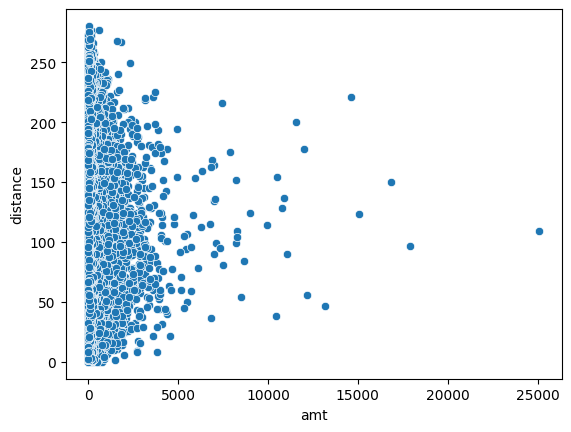

In [386]:
sns.scatterplot(x=not_fraud_df['amt'], y=not_fraud_df['distance'])

<Axes: xlabel='amt', ylabel='distance'>

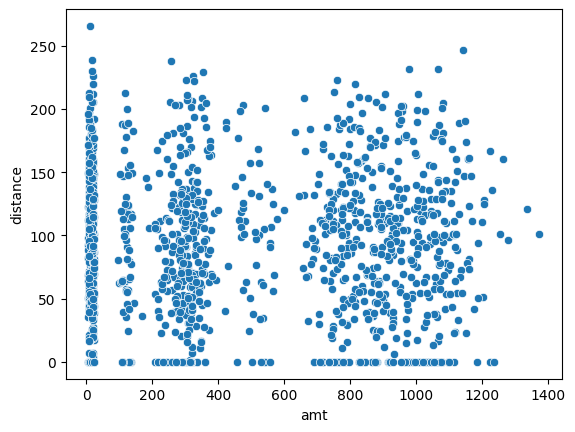

In [387]:
sns.scatterplot(x=is_fraud_df['amt'], y=is_fraud_df['distance'])

In [388]:
combined_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance,is_internet,category_group,transaction_hour,transaction_minute
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House,0.000000,0,travel_transport,0,59
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House,102.736204,0,essentials,3,48
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House,57.853888,0,dining_entertainment,15,46
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House,94.500170,1,shopping,19,53
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House,64.735199,1,shopping,22,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,Rebecca Erickson,117.266472,0,home_family,23,56
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,Ana Howell,134.731580,0,shopping,23,56
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez,124.409392,0,home_family,23,59
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson,28.293005,0,home_family,23,59


In [389]:
combined_df['category'].unique()

array(['gas_transport', 'grocery_pos', 'food_dining', 'shopping_net',
       'shopping_pos', 'kids_pets', 'home', 'misc_net', 'misc_pos',
       'entertainment', 'travel', 'personal_care', 'health_fitness',
       'grocery_net'], dtype=object)

In [390]:
# 새로운 카테고리 그룹 열 추가
def categorize_group(category):
    if category in ['grocery_pos', 'grocery_net', 'personal_care', 'health_fitness']:
        return 'essentials'
    elif category in ['food_dining', 'entertainment']:
        return 'dining_entertainment'
    elif category in ['shopping_net', 'shopping_pos']:
        return 'shopping'
    elif category in ['home', 'kids_pets']:
        return 'home_family'
    elif category in ['travel', 'gas_transport']:
        return 'travel_transport'
    else:
        return 'misc'

In [391]:
combined_df['category_group'] = combined_df['category'].apply(categorize_group)

# 결과 확인
combined_df[['category', 'category_group']].drop_duplicates()

,category,category_group
4794,gas_transport,travel_transport
4816,grocery_pos,essentials
4979,food_dining,dining_entertainment
5073,shopping_net,shopping
5160,shopping_pos,shopping
5341,kids_pets,home_family
5649,home,home_family
5666,misc_net,misc
5705,misc_pos,misc
5789,entertainment,dining_entertainment


In [392]:
combined_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance,is_internet,category_group,transaction_hour,transaction_minute
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House,0.000000,0,travel_transport,0,59
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House,102.736204,0,essentials,3,48
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House,57.853888,0,dining_entertainment,15,46
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House,94.500170,1,shopping,19,53
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House,64.735199,1,shopping,22,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,Rebecca Erickson,117.266472,0,home_family,23,56
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,Ana Howell,134.731580,0,shopping,23,56
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez,124.409392,0,home_family,23,59
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson,28.293005,0,home_family,23,59


In [393]:
temp3 = combined_df[combined_df['is_internet'].isna()]

In [394]:
temp3[temp3['category'].str.endswith('_net', na=False)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance,is_internet,category_group,transaction_hour,transaction_minute


In [395]:
# '_net'으로 끝나는 category 값은 1, 나머지는 0으로 설정하여 새로운 열 'is_internet' 생성
combined_df['is_internet'] = combined_df['category'].apply(lambda x: 1 if x.endswith('_net') else 0)

In [396]:
combined_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance,is_internet,category_group,transaction_hour,transaction_minute
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House,0.000000,0,travel_transport,0,59
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House,102.736204,0,essentials,3,48
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House,57.853888,0,dining_entertainment,15,46
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House,94.500170,1,shopping,19,53
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House,64.735199,1,shopping,22,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,Rebecca Erickson,117.266472,0,home_family,23,56
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,Ana Howell,134.731580,0,shopping,23,56
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez,124.409392,0,home_family,23,59
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson,28.293005,0,home_family,23,59


In [397]:
combined_df.drop_duplicates()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,distance,is_internet,category_group,transaction_hour,transaction_minute
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,Larry House,0.000000,0,travel_transport,0,59
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,Larry House,102.736204,0,essentials,3,48
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,Larry House,57.853888,0,dining_entertainment,15,46
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,Larry House,94.500170,1,shopping,19,53
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,Larry House,64.735199,1,shopping,22,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,Rebecca Erickson,117.266472,0,home_family,23,56
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,Ana Howell,134.731580,0,shopping,23,56
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez,124.409392,0,home_family,23,59
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson,28.293005,0,home_family,23,59


In [398]:
# 'trans_date_trans_time'을 datetime 형식으로 변환 후, 시간만 추출
combined_df['transaction_hour'] = pd.to_datetime(combined_df['trans_date_trans_time']).dt.hour

In [399]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491134 entries, 4794 to 491133
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-null

In [402]:
new_combined_df = combined_df.drop(['transaction_minute','long','lat','trans_date_trans_time','full_name','category','merch_long','merch_lat','last','first','cc_num', 'merchant', 'gender', 'street', 'city','dob','state', 'zip', 'city_pop', 'job', 'trans_num', 'unix_time' ], axis=1)

In [403]:
new_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491134 entries, 4794 to 491133
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt               491134 non-null  float64
 1   is_fraud          491134 non-null  int64  
 2   distance          491134 non-null  float64
 3   is_internet       491134 non-null  int64  
 4   category_group    491134 non-null  object 
 5   transaction_hour  491134 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 24.4+ MB


In [407]:
new_combined_df = pd.get_dummies(new_combined_df)

In [408]:
new_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491134 entries, 4794 to 491133
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   amt                                  491134 non-null  float64
 1   is_fraud                             491134 non-null  int64  
 2   distance                             491134 non-null  float64
 3   is_internet                          491134 non-null  int64  
 4   transaction_hour                     491134 non-null  int32  
 5   category_group_dining_entertainment  491134 non-null  bool   
 6   category_group_essentials            491134 non-null  bool   
 7   category_group_home_family           491134 non-null  bool   
 8   category_group_misc                  491134 non-null  bool   
 9   category_group_shopping              491134 non-null  bool   
 10  category_group_travel_transport      491134 non-null  bool   
dtypes: bool(6), flo